### Read in the CSV files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display

col = ['playerID','G', 'AB', 'R','H', '2B', '3B', 'HR', 'RBI','SB', 'CS','BB','SO', 'IBB','HBP', 'SH', 'SF', 'GIDP']

batting = pd.read_csv('Batting.csv')
bat_df = pd.read_csv('Batting.csv', usecols=col)
players = pd.read_csv('People.csv')
salaries = pd.read_csv('Salaries.csv')

display(batting.columns)

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

### Getting the overall totals of each column

In [2]:
bat_group = bat_df.groupby('playerID', sort=True).sum().reset_index()
bat_group.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0


In [3]:
new_players = pd.merge(bat_group, players, on='playerID')
new_players.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


### Add calculated columns

In [4]:
# Using the f" to format
year = new_players['birthYear'].apply(lambda x: f'{x:.0f}')
month = new_players['birthMonth'].apply(lambda x: f'{x:.0f}')
day = new_players['birthDay'].apply(lambda x: f'{x:.0f}')
# Concate birth year, month, day
dob =  year + "-" + month + "-" + day
# Add column with birth info
new_players['DOB'] = dob

new_players['fullName'] = new_players['nameFirst'].astype(str) + " " + new_players['nameLast'].astype(str)

new_players.drop(['birthYear', 'birthMonth', 'birthDay', 'nameFirst', 'nameLast', 'retroID', 'bbrefID', 'nameGiven'], axis=1, inplace=True)
# Drop rows that have all 'na'
new_players.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,...,NaN,NaN,215.0,75.0,R,R,2004-04-06,2015-08-23,1981-12-27,David Aardsma
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,...,NaN,NaN,180.0,72.0,R,R,1954-04-13,1976-10-03,1934-2-5,Hank Aaron
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,...,GA,Atlanta,190.0,75.0,R,R,1962-04-10,1971-09-26,1939-8-5,Tommie Aaron
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,...,NaN,NaN,190.0,75.0,R,R,1977-07-26,1990-10-03,1954-9-8,Don Aase
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,...,NaN,NaN,184.0,73.0,L,L,2001-09-10,2006-04-13,1972-8-25,Andy Abad


### Show all the players that have played 50+ games and are still active

In [5]:
# Set the variable for the boolean mask
start_date = '2020-04-01'
min_games = 50

mask = (new_players['finalGame'] > start_date) & (new_players['G'] >= min_games)

active_players = new_players.loc[mask]
display(active_players.head())
display(active_players['playerID'].nunique())

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
36,abreujo02,901,3547,483,1038,218,14,179,611.0,10.0,...,NaN,NaN,250.0,75.0,R,R,2014-03-31,2020-08-08,1987-1-29,José Abreu
56,acunaro01,267,1059,205,302,48,6,67,165.0,53.0,...,NaN,NaN,205.0,72.0,R,R,2018-04-25,2020-08-08,1997-12-18,Ronald Acuna
60,adamewi01,237,819,112,215,32,1,30,86.0,10.0,...,NaN,NaN,210.0,72.0,R,R,2018-05-22,2020-08-08,1995-9-2,Willy Adames
85,adamsma01,818,2336,290,609,127,6,116,388.0,4.0,...,NaN,NaN,245.0,75.0,L,R,2012-05-20,2020-08-04,1988-8-31,Matt Adams
116,adriaeh01,422,990,133,246,56,7,16,111.0,17.0,...,NaN,NaN,195.0,73.0,B,R,2013-09-08,2020-08-08,1989-8-21,Ehire Adrianza


723

### Which active player had the most runs batted in (“RBI” from the Batting table) from 2015-2018?

In [6]:
years_to_examine = [2015, 2016, 2017, 2018]
batting_rbi = batting[['playerID', 'yearID', 'RBI', 'H', 'HR', 'G']]
batting_rbi = batting_rbi[batting['yearID'].isin(years_to_examine)]

batting_rbi = batting_rbi.groupby(['playerID'], as_index=False).sum()

most_rbi = batting_rbi[batting_rbi.RBI == batting_rbi.RBI.max()]

player_most_rbi = new_players.loc[new_players['playerID'] == 'arenano01']
display(player_most_rbi)

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,...,deathState,deathCity,weight,height,bats,throws,debut,finalGame,DOB,fullName
459,arenano01,1031,3936,626,1160,253,27,227,734.0,16.0,...,NaN,NaN,215.0,74.0,R,R,2013-04-28,2020-08-08,1991-4-16,Nolan Arenado


### How many double plays did Albert Pujols ground into in 2016

In [7]:
# Get playerID from full name
albert_pujols = new_players.loc[new_players['fullName'] == 'Albert Pujols']
display(albert_pujols['playerID'])
# Using playerID and yearID
gidp_mask = (batting['playerID'] == 'pujolal01') & (batting['yearID'] == 2016)

pujols_gidp = batting[['playerID', 'yearID', 'GIDP']]
pujols_gidp = pujols_gidp.loc[gidp_mask]

display(pujols_gidp)

14322    pujolal01
Name: playerID, dtype: object

,playerID,yearID,GIDP
102421,pujolal01,2016,24.0


### A histogram of triples (3B) per year

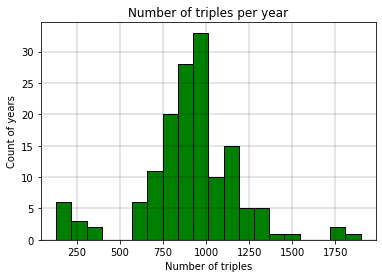

In [8]:
%matplotlib inline
batting['3B'] = pd.to_numeric(batting['3B'])
df_batting = batting[['playerID', 'yearID', '3B', 'SB']]
df_batting = df_batting.groupby('yearID').sum().reset_index()

_ = plt.hist(df_batting['3B'], bins=20, color='g', edgecolor='black')
_ = plt.title('Number of triples per year')
_ = plt.xlabel('Number of triples')
_ = plt.ylabel('Count of years')
_ = plt.grid(color='k', linewidth=0.2)
plt.show()

### Create a scatter plot relating triples (3B) and steals (SB)

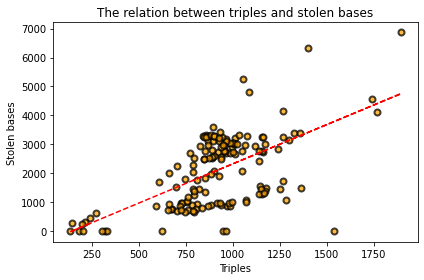

In [9]:
batting_corr = batting[['playerID', 'yearID', '3B', 'SB']]

batting_corr = batting_corr.groupby('yearID').sum().reset_index()

triples = batting_corr['3B']
steals = batting_corr['SB']

_ = plt.scatter(triples, steals, c='orange', cmap='summer', edgecolors='black', linewidths=2, alpha=0.75)
_ = plt.title('The relation between triples and stolen bases')
_ = plt.xlabel('Triples')
_ = plt.ylabel('Stolen bases')

z = np.polyfit(triples, steals, 1)
p = np.poly1d(z)
plt.plot(triples,p(triples),"r--")

plt.tight_layout()
plt.show()

### Which batting statistic, hits, home runs, or runs batted in, had the highest correlation with player salary?
<p>Hypotheses: Home runs will be the highest correlate state for a batter</p>

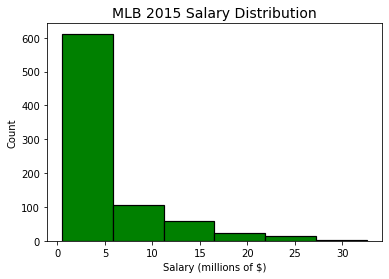

In [10]:
# Going to use 2015 as a focal point
salary_2015 = salaries[salaries['yearID'] == 2015]
salary_2015 = salary_2015.drop(['yearID', 'teamID', 'lgID'], axis=1)
# Get a sense of the players pay scale for that year. Show it in a histogram
plt.hist((salary_2015['salary']/1e6), bins=6, color='g', edgecolor='black', linewidth=1.2, align='mid')
plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
plt.title('MLB 2015 Salary Distribution', size = 14);

<p>A histogram shows that the majority of players are clustered around the same pay,
with a distribution demonstrating some outliers.</p>

In [11]:
# Create a dataframe that only shows that stats we want to work with
# Also going ot use 5 year time period.
years_to_examine = [2013, 2014, 2015, 2016, 2017]
batting_df = batting[['playerID', 'yearID', 'RBI', 'H', 'HR', 'G']]
batting_df = batting_df[batting_df['yearID'].isin(years_to_examine)]
batting_df = batting_df.groupby(['playerID', 'yearID'], as_index=False).sum()
# Wanted to only look at those players to are considered to have play a full season
batting_df = batting_df[batting_df['G'] > 100]
display(batting_df.head(10))

,playerID,yearID,RBI,H,HR,G
8,abreujo02,2014,107.0,176,36,145
9,abreujo02,2015,101.0,178,30,154
10,abreujo02,2016,100.0,183,25,159
11,abreujo02,2017,102.0,189,33,156
19,ackledu01,2013,31.0,97,4,113
20,ackledu01,2014,65.0,123,14,143
21,ackledu01,2015,30.0,55,10,108
25,adamecr01,2016,17.0,49,2,121
34,adamsma01,2013,51.0,84,17,108
35,adamsma01,2014,68.0,152,15,142


In [12]:
def played_in_all_years(records):
    '''Function to create a list for all the playerIDs. Iterate through the list of IDs
    and count times the ID occurs in in the list'''
    ids = list(records['playerID'])
    players_with_five_years = set()
    for player in ids:
        if (ids.count(player)) == len(years_to_examine):
            players_with_five_years.add(player)

    return records[records['playerID'].isin(players_with_five_years)]
# Create the new DataFrames including only players with records in years in the analysis
batting_df = played_in_all_years(batting_df)
batting_df.head(15)

,playerID,yearID,RBI,H,HR,G
123,altuvjo01,2013,52.0,177,5,152
124,altuvjo01,2014,59.0,225,7,158
125,altuvjo01,2015,66.0,200,15,154
126,altuvjo01,2016,96.0,216,24,161
127,altuvjo01,2017,81.0,204,24,153
184,andruel01,2013,67.0,168,4,156
185,andruel01,2014,41.0,163,2,157
186,andruel01,2015,62.0,154,7,160
187,andruel01,2016,69.0,153,8,147
188,andruel01,2017,88.0,191,20,158


In [13]:
# Merge the salary and batting DF
batting_df = batting_df.merge(salary_2015, on='playerID')
batting_df.head()

,playerID,yearID,RBI,H,HR,G,salary
0,altuvjo01,2013,52.0,177,5,152,2500000
1,altuvjo01,2014,59.0,225,7,158,2500000
2,altuvjo01,2015,66.0,200,15,154,2500000
3,altuvjo01,2016,96.0,216,24,161,2500000
4,altuvjo01,2017,81.0,204,24,153,2500000


In [14]:
# Creat 3 DF
prior_years = [2013, 2014]
later_years = [2016, 2017]
# Five year avg
five_year_avg = batting_df.groupby('playerID', as_index=False).mean()

prior_two_years = batting_df[batting_df['yearID'].isin(prior_years)]
prior_two_year_avg = prior_two_years.groupby('playerID', as_index=False).mean()

later_two_years = batting_df[batting_df['yearID'].isin(later_years)]
later_two_year_avg = prior_two_years.groupby('playerID', as_index=False).mean()

In [15]:
# Remove IDs
df_list = [five_year_avg, prior_two_year_avg, later_two_year_avg]

def drop_ids(df_list):
    for df in df_list:
        df.is_copy = False
        df.drop(['yearID'], axis=1, inplace=True)

drop_ids(df_list)

prior_two_year_avg.head(10)

,playerID,RBI,H,HR,G,salary
0,altuvjo01,55.5,201.0,6.0,155.0,2500000.0
1,andruel01,54.0,165.5,3.0,156.5,15000000.0
2,arenano01,56.5,127.0,14.0,122.0,512500.0
3,aybarer01,61.0,156.5,6.5,147.0,8500000.0
4,bautijo02,88.0,137.5,31.5,136.5,14000000.0
5,beltrca01,66.5,129.0,19.5,127.0,15000000.0
6,bruceja01,87.5,135.5,24.0,148.5,12000000.0
7,cabreas01,62.5,128.0,14.0,141.0,7500000.0
8,cabremi01,123.0,192.0,34.5,153.5,22000000.0
9,cainlo01,49.5,121.0,4.5,124.0,2725000.0


The correlation between average RBI over the five years and salary is 0.217
The correlation between average H over the five years and salary is 0.179
The correlation between average HR over the five years and salary is 0.130


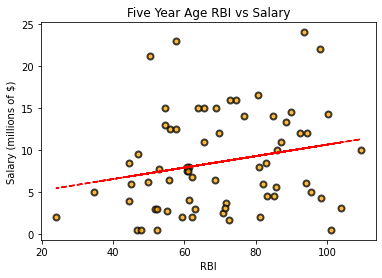

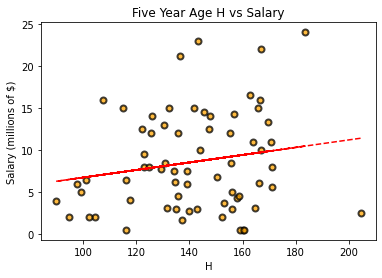

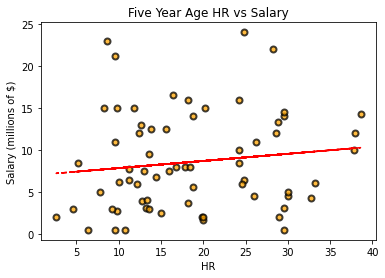

In [20]:
'''A function to plot scatter plots for all
 five year Dataframes '''

def five_year_analysis(record_df, stat_list):
    for stat in stat_list:
        x = record_df[stat]
        y = record_df['salary'] / 1e6
        plt.figure()
        plt.scatter(x, y, c='orange', cmap='summer', edgecolors='black', linewidths=2, alpha=0.75)
        plt.title('Five Year Age {} vs Salary'.format(stat))
        plt.ylabel('Salary (millions of $)')
        plt.xlabel('{}'.format(stat))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--')
        print('The correlation between average {} over the five years and salary is {:0.3f}' \
         .format(stat, record_df.corr()[stat]['salary']))

five_year_analysis(five_year_avg, ['RBI', 'H', 'HR'])